<a href="https://colab.research.google.com/github/dennisorellana2/Capstone_Project/blob/main/data670_capstoneproject_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dennis Orellana
## Capstone Project Part 2

## Purpose: This part 2 of the Exploratory & Data Cleaning Job Posting Dataset.

In [1]:
pip install klib

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# Import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import klib


In [3]:
# upload the csv file from local directory
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving job_posting.csv to job_posting.csv
User uploaded file "job_posting.csv" with length 233679595 bytes


In [4]:
# load the dataset from working directory 

job_posting = pd.read_csv('job_posting.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,8,22,23,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 ## Basic Exploratory Job Posting Dataset

In [5]:
# show the first five rows
job_posting.head()

,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,salary_range,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,url,category,country,inferred_country,post_date,job_type,cursor
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Mission Hills, CA 91345",Mission Hills,CA,91345,NaN,Del Taco LLC,Del Taco is an American quick service restaura...,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000,indeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Atlanta, GA 30342",Atlanta,GA,30342,NaN,FOCUS Brands,"Based in Atlanta, FOCUS Brands Inc. is an inno...",4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000,indeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...","Chicago, IL",Chicago,IL,60654,NaN,Vibes,Vibes Corp. reputation was built and establish...,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000,indeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...","Festus, MO",Festus,MO,63028,NaN,Coldwell Banker Real Estate LLC,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000,indeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...","Cedar Rapids, IA 52404",Cedar Rapids,IA,52404,https://retailcareers.staples.com/ShowJob/Id/7...,Staples Stores,"Staples is The Worklife Fulfillment Company, h...",3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000,indeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# show the five last rows
job_posting.tail()

,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,salary_range,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,url,category,country,inferred_country,post_date,job_type,cursor
57880,Data Scientist,Join Upstart and help build the future of cred...,NaN,Columbus,NaN,NaN,NaN,Upstart,NaN,e9f2ca58c7abcd4553a4a0be9602312e,2019-09-29 00:55:15 +0000,Stackoverflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://stackoverflow.com/jobs/271829,Data Scientist,US,United states,9/27/2019,Full Time,1.569920e+15
57881,"Data Scientist, (Staff or Principal)","Data Scientist, (Staff or Principal) at realto...",NaN,Santa Clara,NaN,NaN,NaN,Realtor.com,NaN,efe05f2364ee3df943e952bc68ed95a7,2019-10-01 00:50:33 +0000,Stackoverflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://stackoverflow.com/jobs/283895,Data Scientist,US,United states,9/11/2019,Full Time,1.569920e+15
57882,"Siri - Embedded Data Scientist, Data Organization",Job Summary: Would you like to play a part in ...,NaN,Pittsburgh,NaN,NaN,NaN,Apple Inc.,NaN,b980054dbb6d3fe1c6a421a237d1495f,2019-09-26 00:53:10 +0000,Stackoverflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://stackoverflow.com/jobs/293326,"Data Scientist, Embedded Developer",US,United states,9/3/2019,Full Time,1.569920e+15
57883,"Data Scientist, (Staff or Principal)","Data Scientist, (Staff or Principal) at realto...",NaN,Santa Clara,NaN,NaN,NaN,Realtor.com,NaN,4b86da9d2b24b87ec3c815d9072ad616,2019-09-27 00:41:31 +0000,Stackoverflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://stackoverflow.com/jobs/283895,Data Scientist,US,United states,9/11/2019,Full Time,1.569920e+15
57884,"Data Scientist, (Staff or Principal)","Data Scientist, (Staff or Principal) at realto...",NaN,Santa Clara,NaN,NaN,NaN,Realtor.com,NaN,4cbe57f790e3346d7154b68c9370b7ef,2019-09-27 00:53:10 +0000,Stackoverflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://stackoverflow.com/jobs/283895,Data Scientist,US,United states,9/11/2019,Full Time,1.569920e+15


In [7]:
# show Dataset columns
job_posting.columns

Index(['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'salary_range',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'function', 'fraudulent', 'url', 'category', 'country',
       'inferred_country', 'post_date', 'job_type', 'cursor'],
      dtype='object')

In [8]:
# show datset size
job_posting.shape

(57885, 29)

##  More Exploratory & Clean Job Posting Dataset##

In [9]:
# show the columns
job_posting.columns

Index(['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'salary_range',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'function', 'fraudulent', 'url', 'category', 'country',
       'inferred_country', 'post_date', 'job_type', 'cursor'],
      dtype='object')

In [10]:
# Show the describe
job_posting.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,cursor
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,9.999000e+03
mean,8940.500000,0.042897,0.795302,0.491723,0.048434,1.562053e+15
std,5161.655742,0.202631,0.403492,0.499945,0.214688,5.808557e+12
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.549430e+15
25%,4470.750000,0.000000,1.000000,0.000000,0.000000,1.557480e+15
50%,8940.500000,0.000000,1.000000,0.000000,0.000000,1.563690e+15
75%,13410.250000,0.000000,1.000000,1.000000,0.000000,1.566310e+15
max,17880.000000,1.000000,1.000000,1.000000,1.000000,1.569920e+15


In [11]:
# total missing values
job_posting.isnull().sum().sum()

1005258

In [12]:
# Drop some columns
job_postingcleaned = job_posting.drop(columns=['url', 'category', 'country',
       'inferred_country', 'post_date', 'cursor'])


In [13]:
# show the leaned job posting columns
job_postingcleaned.columns 

Index(['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'salary_range',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'function', 'fraudulent', 'job_type'],
      dtype='object')

In [14]:
# Check if any duplicate rows
job_postingcleaned.duplicated().sum()

99

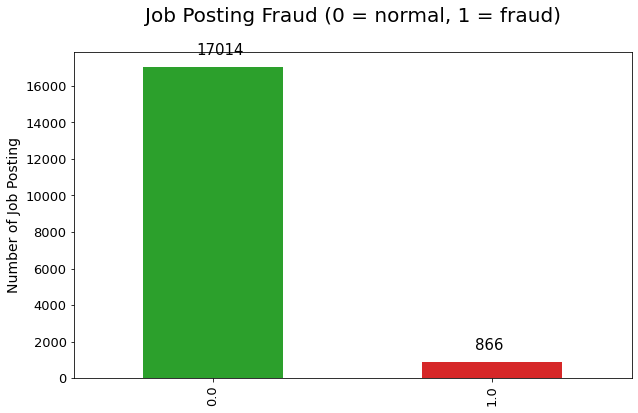

In [15]:
# Plot Job Posting Fraud 
ax = job_postingcleaned['fraudulent'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=('#2ca02c', '#d62728'))
ax.set_title('Job Posting Fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of Job Posting', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [16]:
 # show the information
job_postingcleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57885 entries, 0 to 57884
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           57884 non-null  object 
 1   job_description     57881 non-null  object 
 2   location            47536 non-null  object 
 3   city                39754 non-null  object 
 4   state               39587 non-null  object 
 5   zip_code            28889 non-null  object 
 6   apply_url           18392 non-null  object 
 7   company_name        40000 non-null  object 
 8   companydescription  19662 non-null  object 
 9   uniq_id             40001 non-null  object 
 10  crawl_timestamp     40005 non-null  object 
 11  job_board           39311 non-null  object 
 12  job_id              17880 non-null  float64
 13  department          6333 non-null   object 
 14  salary_range        2868 non-null   object 
 15  requirements        15185 non-null  object 
 16  bene

GridSpec(6, 6)

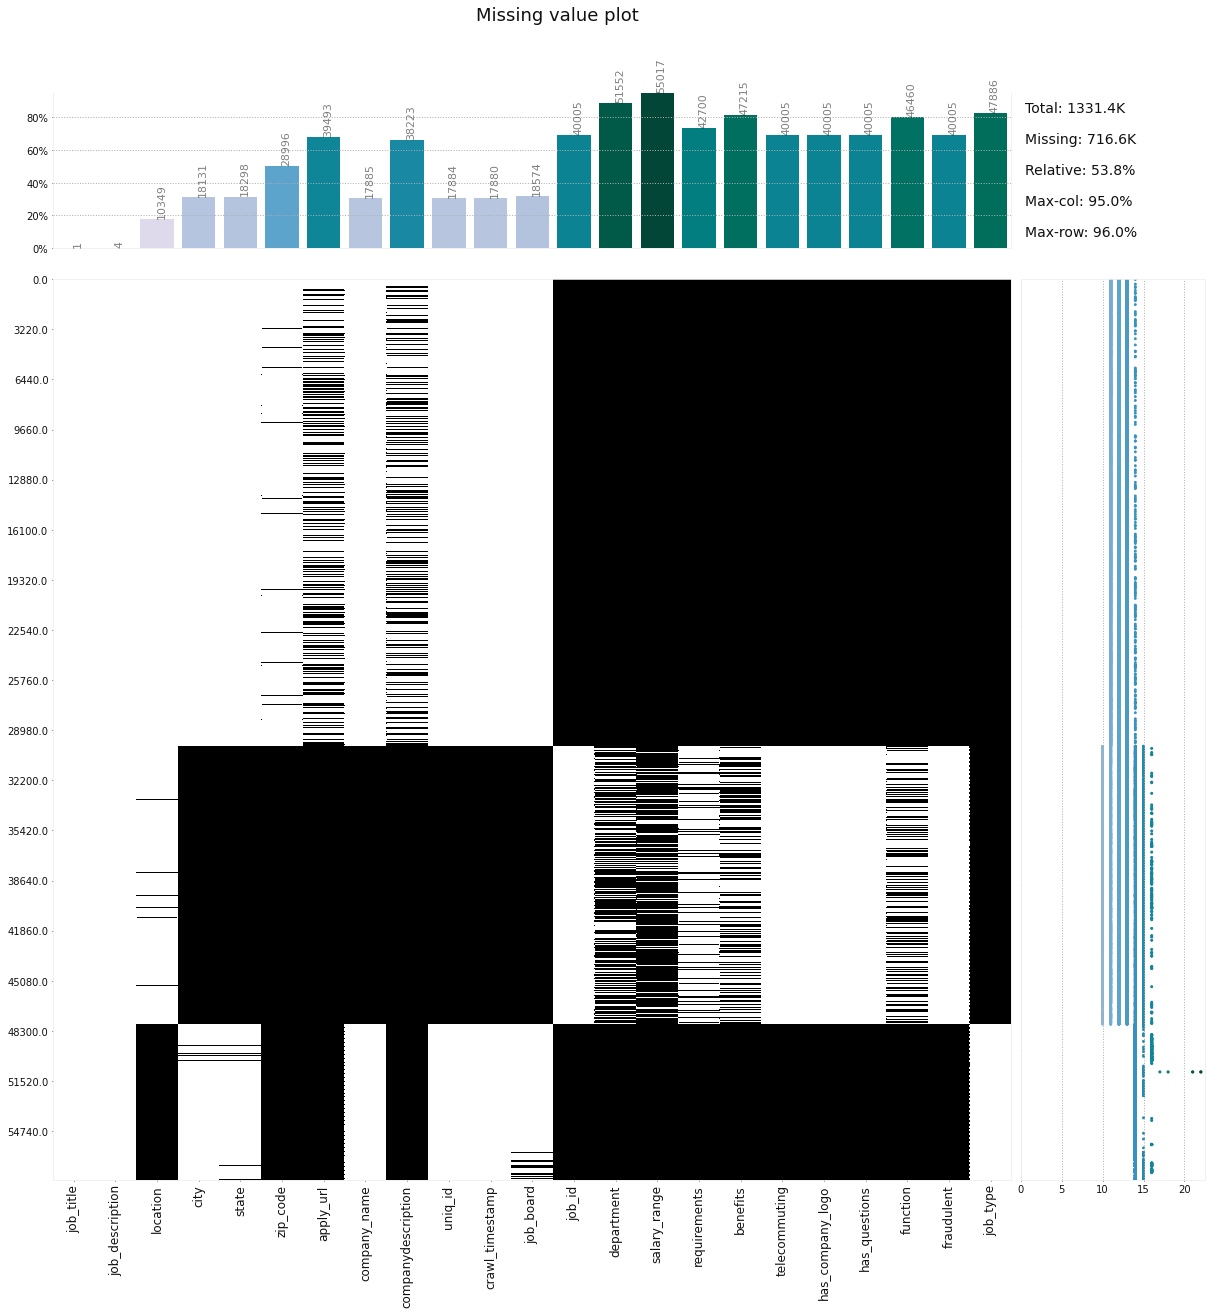

In [17]:
# Plot the missing values 
klib.missingval_plot(job_postingcleaned) 

In [18]:
# Missing values for each column 
job_postingcleaned.isnull().sum()

job_title                 1
job_description           4
location              10349
city                  18131
state                 18298
zip_code              28996
apply_url             39493
company_name          17885
companydescription    38223
uniq_id               17884
crawl_timestamp       17880
job_board             18574
job_id                40005
department            51552
salary_range          55017
requirements          42700
benefits              47215
telecommuting         40005
has_company_logo      40005
has_questions         40005
function              46460
fraudulent            40005
job_type              47886
dtype: int64

In [19]:
# Show columns 
job_postingcleaned.columns

Index(['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'salary_range',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'function', 'fraudulent', 'job_type'],
      dtype='object')

In [20]:
# Show job posting shape
job_postingcleaned.shape

(57885, 23)

In [21]:
# Clean data using Klib Function
job_posting_supercleaned = klib.data_cleaning(job_postingcleaned)

Shape of cleaned data: (57784, 22)Remaining NAs: 660228

Changes:
Dropped rows: 101
     of which 99 duplicates. (Rows: [50442, 50443, 50444, 50445, 50446, 50447, 50448, 50449, 50450, 50459, 50460, 50461, 50462, 50464, 50465, 50466, 50467, 50468, 50469, 50470, 50471, 50472, 50473, 50475, 50476, 50477, 50478, 50479, 50480, 50481, 50482, 50483, 50484, 50485, 50486, 50487, 50488, 50489, 50502, 50503, 50504, 50505, 50506, 50507, 50508, 50509, 50520, 50521, 50522, 50523, 50524, 50525, 50727, 50729, 50730, 50731, 50732, 50733, 50734, 50735, 50736, 50737, 50738, 50740, 50840, 50881, 50887, 50919, 50920, 50921, 50922, 50923, 50924, 50925, 50926, 50927, 50928, 50929, 50930, 50942, 50948, 50969, 51030, 51031, 51081, 51086, 51090, 51128, 51141, 51145, 51162, 51185, 51197, 51198, 51199, 51200, 51216, 51223, 51247])
Dropped columns: 1
     of which 0 single valued.     Columns: []
Dropped missing values: 56345
Reduced memory by at least: 2.84 MB (-27.95%)



In [22]:
# Memory usage
job_posting_supercleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57784 entries, 0 to 57884
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job_title           57784 non-null  string  
 1   job_description     57782 non-null  string  
 2   location            47536 non-null  string  
 3   city                39655 non-null  string  
 4   state               39488 non-null  category
 5   zip_code            28889 non-null  string  
 6   apply_url           18392 non-null  string  
 7   company_name        39901 non-null  string  
 8   companydescription  19662 non-null  string  
 9   uniq_id             39902 non-null  string  
 10  crawl_timestamp     39904 non-null  string  
 11  job_board           39212 non-null  category
 12  job_id              17880 non-null  float32 
 13  department          6333 non-null   category
 14  requirements        15185 non-null  string  
 15  benefits            10670 non-null  

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


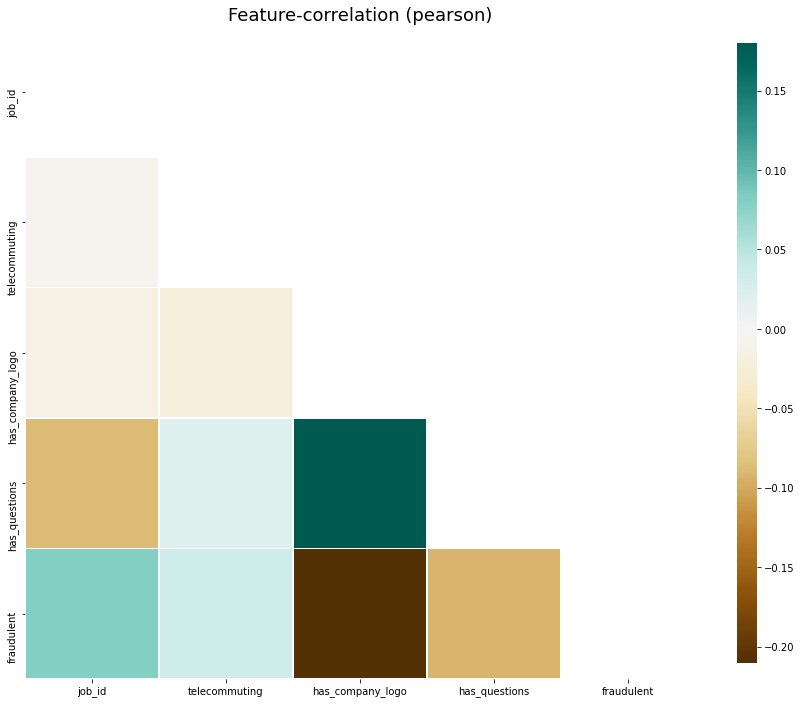

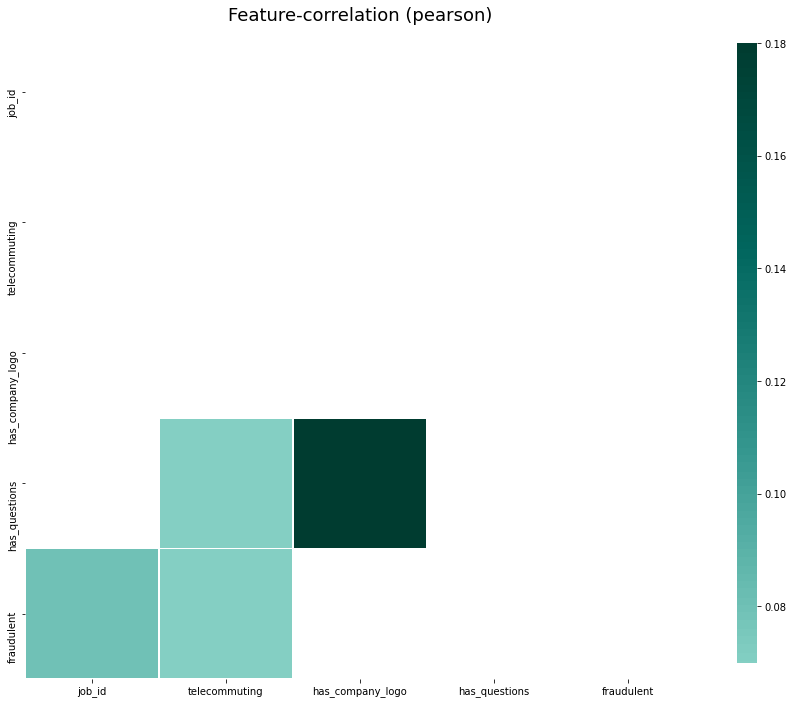

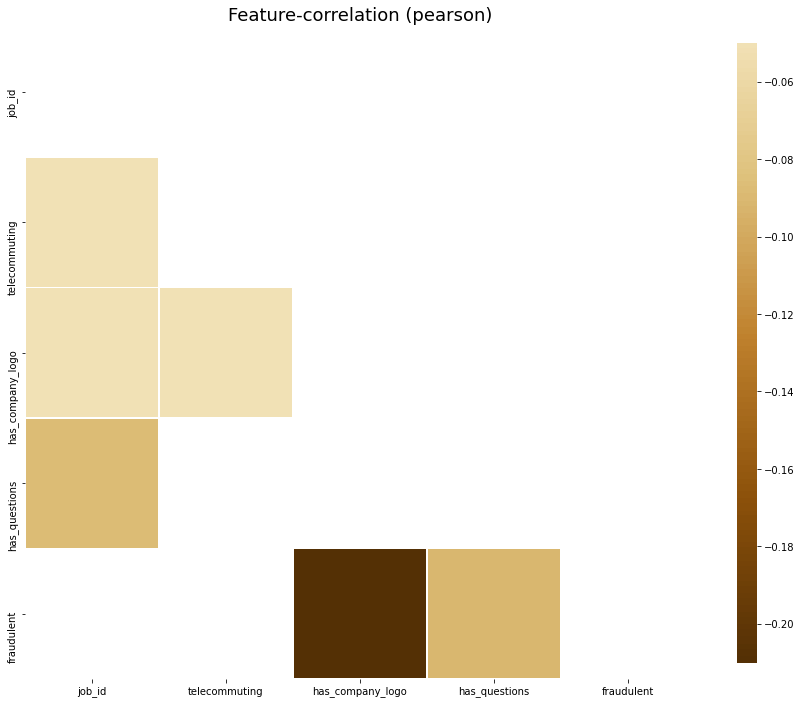

In [23]:
# Correlation Plots

klib.corr_plot(job_posting_supercleaned, annot=False, figsize=(15,12))
klib.corr_plot(job_posting_supercleaned, split='pos', annot=False, figsize=(15,12))
klib.corr_plot(job_posting_supercleaned, split='neg', annot=False, figsize=(15,12))

GridSpec(6, 17)

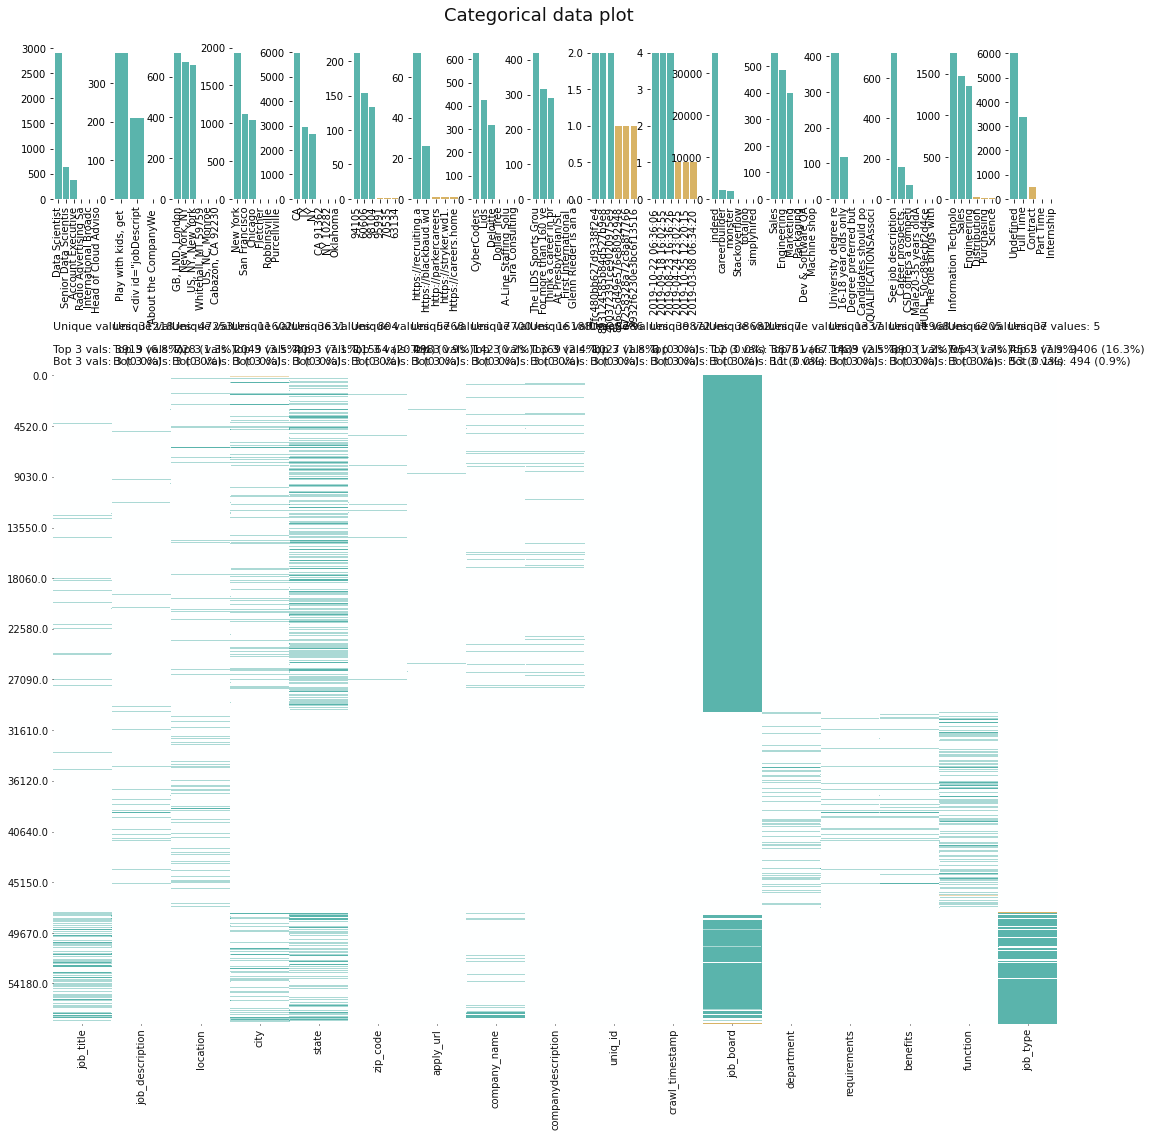

In [24]:
# Categorical Plots 
klib.cat_plot(job_posting_supercleaned)

In [25]:
# Show missing values in each columns
job_posting_supercleaned.isnull().sum()

job_title                 0
job_description           2
location              10248
city                  18129
state                 18296
zip_code              28895
apply_url             39392
company_name          17883
companydescription    38122
uniq_id               17882
crawl_timestamp       17880
job_board             18572
job_id                39904
department            51451
requirements          42599
benefits              47114
telecommuting         39904
has_company_logo      39904
has_questions         39904
function              46359
fraudulent            39904
job_type              47884
dtype: int64

In [26]:
# display first five values for job_id 
job_posting_supercleaned['job_id'].head

<bound method NDFrame.head of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
57880   NaN
57881   NaN
57882   NaN
57883   NaN
57884   NaN
Name: job_id, Length: 57784, dtype: float32>

In [27]:
# Set the numerical data
df_num = job_posting_supercleaned[['job_id','telecommuting','has_company_logo','has_questions','fraudulent']]

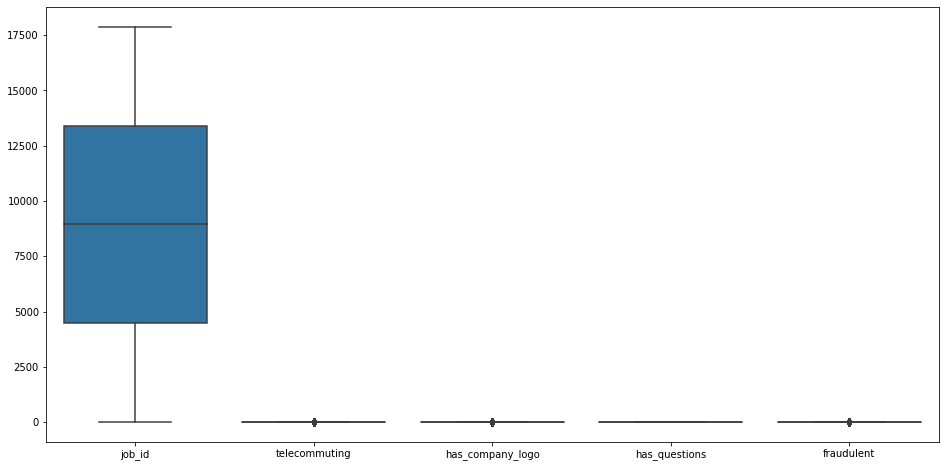

In [28]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

# There aren't outliers

##  Handle Missing Values in Job Posting Dataset##

In [29]:
# Show missing values in each columns
job_posting_supercleaned.isnull().sum()

job_title                 0
job_description           2
location              10248
city                  18129
state                 18296
zip_code              28895
apply_url             39392
company_name          17883
companydescription    38122
uniq_id               17882
crawl_timestamp       17880
job_board             18572
job_id                39904
department            51451
requirements          42599
benefits              47114
telecommuting         39904
has_company_logo      39904
has_questions         39904
function              46359
fraudulent            39904
job_type              47884
dtype: int64

In [30]:
# Most frequent values in Location column 
job_posting_supercleaned["location"].value_counts ()

GB, LND, London          718
New York, NY             673
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
                        ... 
Macomb, IL 61455           1
AU, , Australia            1
Jefferson, WI              1
Orlando, FL 32836          1
Tallassee, AL 36078        1
Name: location, Length: 11602, dtype: Int64

In [31]:
# Convert Columns into Category
job_posting_supercleaned['job_title'] = job_posting_supercleaned['job_title'].astype("category")
job_posting_supercleaned['job_description'] = job_posting_supercleaned['job_description'].astype("category")
job_posting_supercleaned['function'] = job_posting_supercleaned['function'].astype("category")
job_posting_supercleaned['department'] = job_posting_supercleaned['department'].astype("category")
job_posting_supercleaned['benefits'] = job_posting_supercleaned['benefits'].astype("category")
job_posting_supercleaned['job_type'] = job_posting_supercleaned['job_type'].astype("category")

In [32]:
# show data types
job_posting_supercleaned.dtypes

job_title             category
job_description       category
location                string
city                    string
state                 category
zip_code                string
apply_url               string
company_name            string
companydescription      string
uniq_id                 string
crawl_timestamp         string
job_board             category
job_id                 float32
department            category
requirements            string
benefits              category
telecommuting          float32
has_company_logo       float32
has_questions          float32
function              category
fraudulent             float32
job_type              category
dtype: object

In [33]:
# Replace the missing values with the most frequent values for each column
job_posting_supercleaned['location'] = job_posting_supercleaned['location'].fillna(job_posting_supercleaned["location"].value_counts().index[0])
job_posting_supercleaned['city'] = job_posting_supercleaned['city'].fillna(job_posting_supercleaned["city"].value_counts().index[0])
job_posting_supercleaned['state'] = job_posting_supercleaned['state'].fillna(job_posting_supercleaned["state"].value_counts().index[0])
job_posting_supercleaned['zip_code'] = job_posting_supercleaned['zip_code'].fillna(job_posting_supercleaned["zip_code"].value_counts().index[0])
job_posting_supercleaned['apply_url'] = job_posting_supercleaned['apply_url'].fillna(job_posting_supercleaned["apply_url"].value_counts().index[0])
job_posting_supercleaned['company_name'] = job_posting_supercleaned['company_name'].fillna(job_posting_supercleaned["company_name"].value_counts().index[0])
job_posting_supercleaned['companydescription'] = job_posting_supercleaned['companydescription'].fillna(job_posting_supercleaned["companydescription"].value_counts().index[0])
job_posting_supercleaned['uniq_id'] = job_posting_supercleaned['uniq_id'].fillna(job_posting_supercleaned["uniq_id"].value_counts().index[0])
job_posting_supercleaned['crawl_timestamp'] = job_posting_supercleaned['crawl_timestamp'].fillna(job_posting_supercleaned["crawl_timestamp"].value_counts().index[0])
job_posting_supercleaned['job_board'] = job_posting_supercleaned['job_board'].fillna(job_posting_supercleaned["job_board"].value_counts().index[0])
job_posting_supercleaned['job_id'] = job_posting_supercleaned['job_id'].fillna(job_posting_supercleaned["job_id"].value_counts().index[0])
job_posting_supercleaned['requirements'] = job_posting_supercleaned['requirements'].fillna(job_posting_supercleaned["requirements"].value_counts().index[0])
job_posting_supercleaned['telecommuting'] = job_posting_supercleaned['telecommuting'].fillna(job_posting_supercleaned["telecommuting"].value_counts().index[0])
job_posting_supercleaned['has_company_logo'] = job_posting_supercleaned['has_company_logo'].fillna(job_posting_supercleaned["has_company_logo"].value_counts().index[0])
job_posting_supercleaned['has_questions'] = job_posting_supercleaned['has_questions'].fillna(job_posting_supercleaned["has_questions"].value_counts().index[0])
job_posting_supercleaned['function'] = job_posting_supercleaned['function'].fillna(job_posting_supercleaned["function"].value_counts().index[0])
job_posting_supercleaned['job_description'] = job_posting_supercleaned['job_description'].fillna(job_posting_supercleaned["job_description"].value_counts().index[0])
job_posting_supercleaned['department'] = job_posting_supercleaned['department'].fillna(job_posting_supercleaned["department"].value_counts().index[0])
job_posting_supercleaned['benefits'] = job_posting_supercleaned['benefits'].fillna(job_posting_supercleaned["benefits"].value_counts().index[0])
job_posting_supercleaned['job_type'] = job_posting_supercleaned['job_type'].fillna(job_posting_supercleaned["job_type"].value_counts().index[0])
job_posting_supercleaned['job_title'] = job_posting_supercleaned['job_title'].fillna(job_posting_supercleaned["job_title"].value_counts().index[0])

In [34]:
# Show  fraudulent column values
job_posting_supercleaned['fraudulent'].value_counts()

0.0    17014
1.0      866
Name: fraudulent, dtype: int64

In [35]:
# fraudulent shape
fraud = job_posting_supercleaned[job_posting_supercleaned['fraudulent']== 1]
fraud.shape

(866, 22)

In [36]:
# non_fraudulent shape
not_fraud = job_posting_supercleaned[job_posting_supercleaned['fraudulent']== 0]
not_fraud.shape

(17014, 22)

In [37]:
# Balance the fraudulent column
fraud = fraud.sample(17014, replace=True)

In [38]:
# Show the fraud and non_fraud shape
fraud.shape, not_fraud.shape

((17014, 22), (17014, 22))

In [39]:
# Append Method in the fraudulent column
job_posting_supercleaned = fraud.append(not_fraud)
job_posting_supercleaned.reset_index()

,index,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type
0,47814,Hiring for SAP Supply Chain Manager,"Position :Manager, Business Solutions-SAP/Supp...","US, WA, Bellevue",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17813.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined
1,47543,Payroll Clerk,We are seeking a full time Payroll Clerk to ma...,"US, GA,",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17542.0,Account,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0.0,0.0,0.0,Financial Analyst,1.0,Undefined
2,47671,Data Entry Admin/Clerical Positions - Work Fro...,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,"US, KY, Louisville",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17670.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined
3,38679,Project Subcontracting Manager,Corporate overviewAker Solutions is a global p...,"US, TX, Houston",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,8678.0,Sales,Qualifications &amp; personal attributes- MSc....,We offer• Friendly colleagues in an industry w...,0.0,1.0,0.0,Engineering,1.0,Undefined
4,37413,Senior Local Government Affairs Representative,Apply using below link#URL_ea54d715858cb6aef8d...,US,New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,7412.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023,47877,Account Director - Distribution,Just in case this is the first time you’ve vis...,"CA, ON, Toronto",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17876.0,Sales,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0.0,1.0,1.0,Sales,0.0,Undefined
34024,47878,Payroll Accountant,The Payroll Accountant will focus primarily on...,"US, PA, Philadelphia",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17877.0,Accounting,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0.0,1.0,1.0,Accounting/Auditing,0.0,Undefined
34025,47879,Project Cost Control Staff Engineer - Cost Con...,Experienced Project Cost Control Staff Enginee...,"US, TX, Houston",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17878.0,Sales,At least 12 years professional experience.Abil...,See job description,0.0,0.0,0.0,Information Technology,0.0,Undefined
34026,47880,Graphic Designer

In [40]:
# Show Missing values in each columns after cleaning 
job_posting_supercleaned.isnull().sum()

# There are no missing values


job_title             0
job_description       0
location              0
city                  0
state                 0
zip_code              0
apply_url             0
company_name          0
companydescription    0
uniq_id               0
crawl_timestamp       0
job_board             0
job_id                0
department            0
requirements          0
benefits              0
telecommuting         0
has_company_logo      0
has_questions         0
function              0
fraudulent            0
job_type              0
dtype: int64

In [41]:
# show job_posting_supercleaned values
job_posting_supercleaned['job_type'].values

['Undefined', 'Undefined', 'Undefined', 'Undefined', 'Undefined', ..., 'Undefined', 'Undefined', 'Undefined', 'Undefined', 'Undefined']
Length: 34028
Categories (5, object): ['Contract', 'Full Time', 'Internship', 'Part Time', 'Undefined']

In [42]:
# Add column about Full Time or not
job_posting_supercleaned['Full Time'] = np.where(job_posting_supercleaned['job_type'] != 'Full Time', 'no','yes')
job_posting_supercleaned.head()

,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type,Full Time
47814,Hiring for SAP Supply Chain Manager,"Position :Manager, Business Solutions-SAP/Supp...","US, WA, Bellevue",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17813.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no
47543,Payroll Clerk,We are seeking a full time Payroll Clerk to ma...,"US, GA,",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17542.0,Account,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0.0,0.0,0.0,Financial Analyst,1.0,Undefined,no
47671,Data Entry Admin/Clerical Positions - Work Fro...,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,"US, KY, Louisville",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17670.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no
38679,Project Subcontracting Manager,Corporate overviewAker Solutions is a global p...,"US, TX, Houston",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,8678.0,Sales,Qualifications &amp; personal attributes- MSc....,We offer• Friendly colleagues in an industry w...,0.0,1.0,0.0,Engineering,1.0,Undefined,no
37413,Senior Local Government Affairs Representative,Apply using below link#URL_ea54d715858cb6aef8d...,US,New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,7412.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no


In [43]:
# Add column about IT job or not
job_posting_supercleaned['I.T'] = np.where(job_posting_supercleaned['department'] != 'Information Technology', 'no','yes')
job_posting_supercleaned.head()

,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type,Full Time,I.T
47814,Hiring for SAP Supply Chain Manager,"Position :Manager, Business Solutions-SAP/Supp...","US, WA, Bellevue",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17813.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no
47543,Payroll Clerk,We are seeking a full time Payroll Clerk to ma...,"US, GA,",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17542.0,Account,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0.0,0.0,0.0,Financial Analyst,1.0,Undefined,no,no
47671,Data Entry Admin/Clerical Positions - Work Fro...,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,"US, KY, Louisville",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17670.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no
38679,Project Subcontracting Manager,Corporate overviewAker Solutions is a global p...,"US, TX, Houston",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,8678.0,Sales,Qualifications &amp; personal attributes- MSc....,We offer• Friendly colleagues in an industry w...,0.0,1.0,0.0,Engineering,1.0,Undefined,no,no
37413,Senior Local Government Affairs Representative,Apply using below link#URL_ea54d715858cb6aef8d...,US,New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,7412.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no


In [44]:
# Show values about department
job_posting_supercleaned['department'].values

['Sales', 'Account', 'Sales', 'Sales', 'Sales', ..., 'Sales', 'Accounting', 'Sales', 'Sales', 'Engineering']
Length: 34028
Categories (1337, object): [' ', ' \tCorporate Shared Services',
                            ' Lower Level Management', ' Marketing ', ..., 'web development', 'Área Comercial',
                            'ΕΜΠΟΡΙΚΟ', 'ΠΛΗΡΟΦΟΡΙΚΗ']

In [45]:
# Add column about IT job or not
job_posting_supercleaned['I.T'] = np.where(job_posting_supercleaned['department'] != 'Information Technology', 'no','yes')
job_posting_supercleaned.head()


,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type,Full Time,I.T
47814,Hiring for SAP Supply Chain Manager,"Position :Manager, Business Solutions-SAP/Supp...","US, WA, Bellevue",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17813.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no
47543,Payroll Clerk,We are seeking a full time Payroll Clerk to ma...,"US, GA,",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17542.0,Account,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0.0,0.0,0.0,Financial Analyst,1.0,Undefined,no,no
47671,Data Entry Admin/Clerical Positions - Work Fro...,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,"US, KY, Louisville",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,17670.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no
38679,Project Subcontracting Manager,Corporate overviewAker Solutions is a global p...,"US, TX, Houston",New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,8678.0,Sales,Qualifications &amp; personal attributes- MSc....,We offer• Friendly colleagues in an industry w...,0.0,1.0,0.0,Engineering,1.0,Undefined,no,no
37413,Senior Local Government Affairs Representative,Apply using below link#URL_ea54d715858cb6aef8d...,US,New York,CA,94105,https://recruiting.adp.com/srccar/public/unsup...,CyberCoders,"The LIDS Sports Group, operating within Hat Wo...",7fc480bb627d9338f2e47be55af1e5c6,2019-10-22 06:36:06 +0000,indeed,7412.0,Sales,University degree required. TEFL / TESOL / CEL...,See job description,0.0,0.0,0.0,Information Technology,1.0,Undefined,no,no


In [46]:
# Export job_posting_supercleaned as a csv file
#job_posting_supercleaned.to_csv (r'C:\Documents\Data 670\Capstone Dataset\job_posting_supercleaned.csv', index = False, header=True)

##  Convert the Job Posting Categorical Columns to Numerical ##


In [47]:
# Import LabelEncoder to convert numerical data
from sklearn.preprocessing import LabelEncoder

In [48]:
# Dataset type
job_posting_supercleaned.dtypes

job_title             category
job_description       category
location                string
city                    string
state                 category
zip_code                string
apply_url               string
company_name            string
companydescription      string
uniq_id                 string
crawl_timestamp         string
job_board             category
job_id                 float32
department            category
requirements            string
benefits              category
telecommuting          float32
has_company_logo       float32
has_questions          float32
function              category
fraudulent             float32
job_type              category
Full Time               object
I.T                     object
dtype: object

In [49]:
# data size 
job_posting_supercleaned.shape


(34028, 24)

In [50]:
# Convert the dataset into numerical data
le = LabelEncoder()
job_posting_supercleaned['job_title'] = le.fit_transform(job_posting_supercleaned['job_title'])
job_posting_supercleaned['job_description'] = le.fit_transform(job_posting_supercleaned['job_description'])
job_posting_supercleaned['location'] = le.fit_transform(job_posting_supercleaned['location'])
job_posting_supercleaned['city'] = le.fit_transform(job_posting_supercleaned['city'])
job_posting_supercleaned['state'] = le.fit_transform(job_posting_supercleaned['state'])
job_posting_supercleaned['zip_code'] = le.fit_transform(job_posting_supercleaned['zip_code'])
job_posting_supercleaned['apply_url'] = le.fit_transform(job_posting_supercleaned['apply_url'])
job_posting_supercleaned['company_name'] = le.fit_transform(job_posting_supercleaned['company_name'])
job_posting_supercleaned['companydescription'] = le.fit_transform(job_posting_supercleaned['companydescription'])
job_posting_supercleaned['uniq_id'] = le.fit_transform(job_posting_supercleaned['uniq_id'])
job_posting_supercleaned['crawl_timestamp'] = le.fit_transform(job_posting_supercleaned['crawl_timestamp'])
job_posting_supercleaned['job_board'] = le.fit_transform(job_posting_supercleaned['job_board'])
job_posting_supercleaned['job_id'] = le.fit_transform(job_posting_supercleaned['job_id'])
job_posting_supercleaned['requirements'] = le.fit_transform(job_posting_supercleaned['requirements'])
job_posting_supercleaned['telecommuting'] = le.fit_transform(job_posting_supercleaned['telecommuting'])
job_posting_supercleaned['has_company_logo'] = le.fit_transform(job_posting_supercleaned['has_company_logo'])
job_posting_supercleaned['has_questions'] = le.fit_transform(job_posting_supercleaned['has_questions'])
job_posting_supercleaned['function'] = le.fit_transform(job_posting_supercleaned['function'])
job_posting_supercleaned['fraudulent'] = le.fit_transform(job_posting_supercleaned['fraudulent'])
job_posting_supercleaned['department'] = le.fit_transform(job_posting_supercleaned['department'])
job_posting_supercleaned['benefits'] = le.fit_transform(job_posting_supercleaned['benefits'])
job_posting_supercleaned['job_type'] = le.fit_transform(job_posting_supercleaned['job_type'])
job_posting_supercleaned['Full Time'] = le.fit_transform(job_posting_supercleaned['Full Time'])
job_posting_supercleaned['I.T'] = le.fit_transform(job_posting_supercleaned['I.T'])

In [51]:
# rename the dataset
job_posting_final = job_posting_supercleaned

In [52]:
# Show the data types
job_posting_final.dtypes

job_title             int64
job_description       int64
location              int64
city                  int64
state                 int64
zip_code              int64
apply_url             int64
company_name          int64
companydescription    int64
uniq_id               int64
crawl_timestamp       int64
job_board             int64
job_id                int64
department            int64
requirements          int64
benefits              int64
telecommuting         int64
has_company_logo      int64
has_questions         int64
function              int64
fraudulent            int64
job_type              int64
Full Time             int64
I.T                   int64
dtype: object

In [53]:
# Show the first 5 rows
job_posting_final.head()

,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type,Full Time,I.T
47814,4442,7969,2985,0,0,0,0,0,0,0,0,0,17812,1054,9893,4080,0,0,0,18,1,0,0,0
47543,7105,13025,1799,0,0,0,0,0,0,0,0,0,17541,56,11882,5035,0,0,0,14,1,0,0,0
47671,2432,832,2013,0,0,0,0,0,0,0,0,0,17669,1054,9893,4080,0,0,0,18,1,0,0,0
38679,7633,3111,2875,0,0,0,0,0,0,0,0,0,8677,1054,6583,5253,0,1,0,12,1,0,0,0
37413,8975,1480,1248,0,0,0,0,0,0,0,0,0,7411,1054,9893,4080,0,0,0,18,1,0,0,0


In [54]:
# Show the tail 5 rows
job_posting_final.tail()


,job_title,job_description,location,city,state,zip_code,apply_url,company_name,companydescription,uniq_id,crawl_timestamp,job_board,job_id,department,requirements,benefits,telecommuting,has_company_logo,has_questions,function,fraudulent,job_type,Full Time,I.T
47877,268,6152,166,0,0,0,0,0,0,0,0,0,17875,1054,9679,5457,0,1,1,31,0,0,0,0
47878,7101,10355,2734,0,0,0,0,0,0,0,0,0,17876,62,152,2548,0,1,1,0,0,0,0,0
47879,7579,4258,2875,0,0,0,0,0,0,0,0,0,17877,1054,1789,4080,0,0,0,18,0,0,0,0
47880,4107,7024,1045,0,0,0,0,0,0,0,0,0,17878,1054,443,1707,0,0,1,9,0,0,0,0
47881,10896,13962,1092,0,0,0,0,0,0,0,0,0,17879,434,10236,4080,0,1,1,12,0,0,0,0


In [55]:
# show the dataset shape
job_posting_final.shape

(34028, 24)

## More Data Visualization #


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


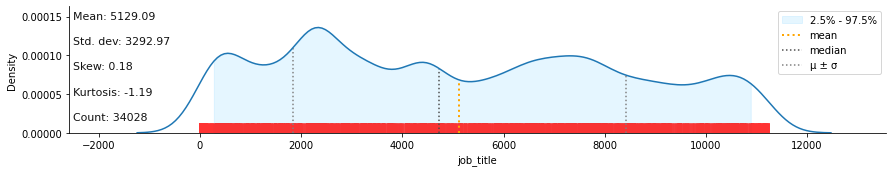

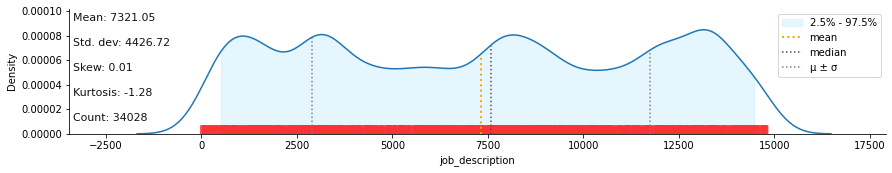

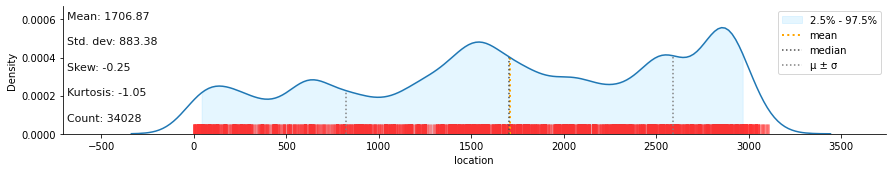

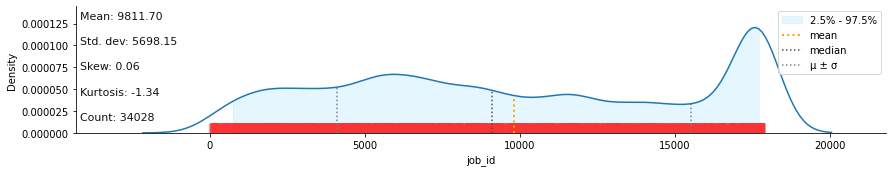

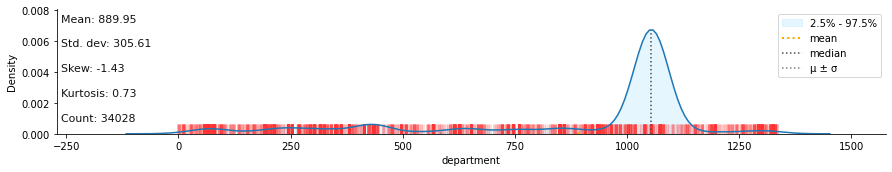

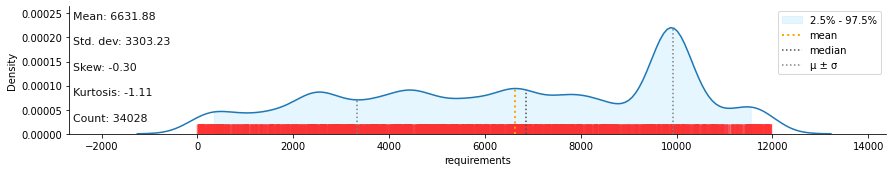

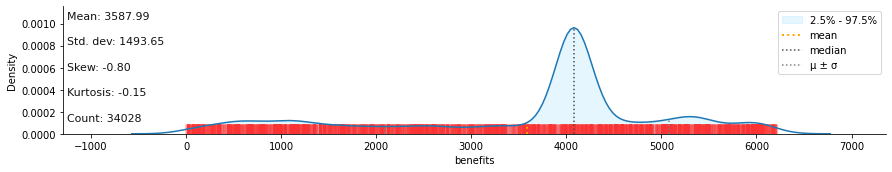

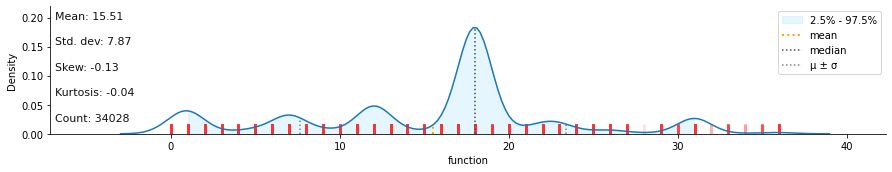

In [56]:
# distribution plot
klib.dist_plot(job_posting_final)

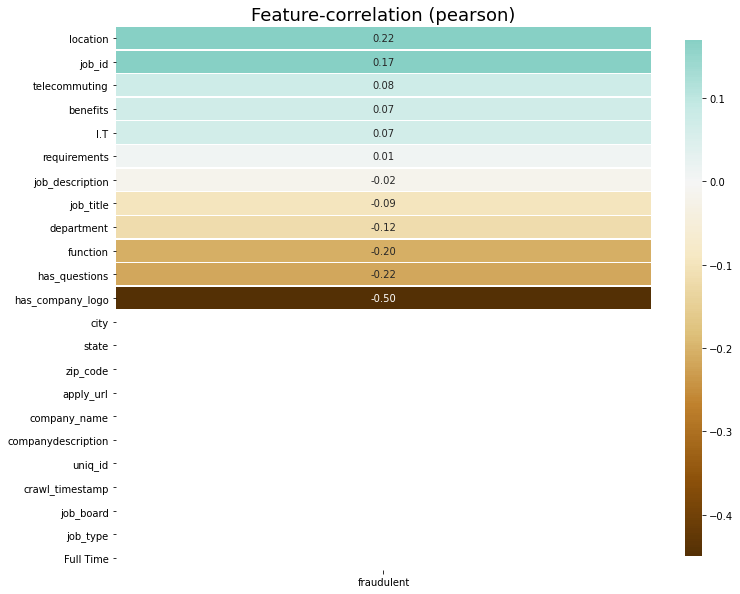

In [57]:
# Correlations with feature plot
# The target is the fraudulent column
klib.corr_plot(job_posting_final, target='fraudulent')

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


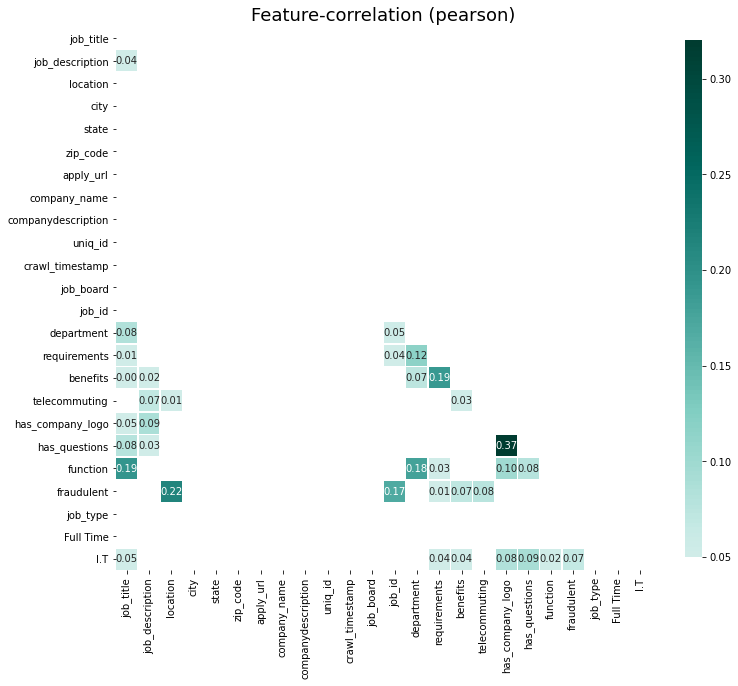

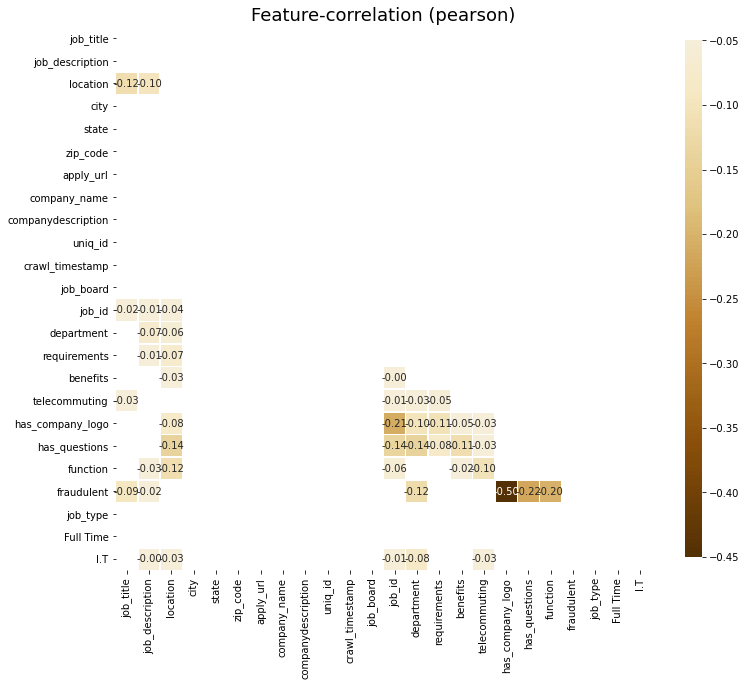

In [58]:
# Displaying the postive and negative correlations plots
klib.corr_plot(job_posting_final, split='pos') # displaying only positive correlations
klib.corr_plot(job_posting_final, split='neg') # displaying only negative correlations

In [59]:
# Export job_posting_final as a csv file
#job_posting_final.to_csv (r'C:\Documents\Data 670\Capstone Dataset\job_posting_final.csv', index = False, header=True)

# End of Script 